### BUSINESS UNDERSTANDING
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 

#### Objectives
1. Determine which aircraft are the lowest risk for the company to start this new business endeavor. 
2. Translate your findings into actionable insights that drive the choice of which aircraft to purchase.

#### Success Criteria
Atleast three concrete business recommendations for how the business should move forward with the new aviation opportunity.

#### Questions to guide the analysis
- What defines a low risk aircraft according to the data provided?


### DATA UNDERSTANDING

In [131]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [219]:
# Loading the data using pandas

df = pd.read_csv('AviationData.csv', encoding='latin-1')

In [220]:
# Preview of the data set
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [221]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [222]:
# More info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

- From the data, we can define a low risk aircraft by comparing type of aircraft and accidents they have been involved in.
- Are a specific type of aircraft more prone to accidents?
- Immediately, we can see some columns that we can term as irrelevant to our analysis i.e 'Airport.Code', 'Airport.Name',
  'Latitude','Longitude','Accident.Number' and others. We can focus majorly on attributes relating to type of aircraft and        accidents data.
- We can also see some columns whose values are majorly null values.
- Most of the columns have categorical data, a few have continuous data. Investigating the continuous data:

In [223]:
# Summary of the continuous data

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We can see that the number of serious, minor and fatal injuries are almost at per.

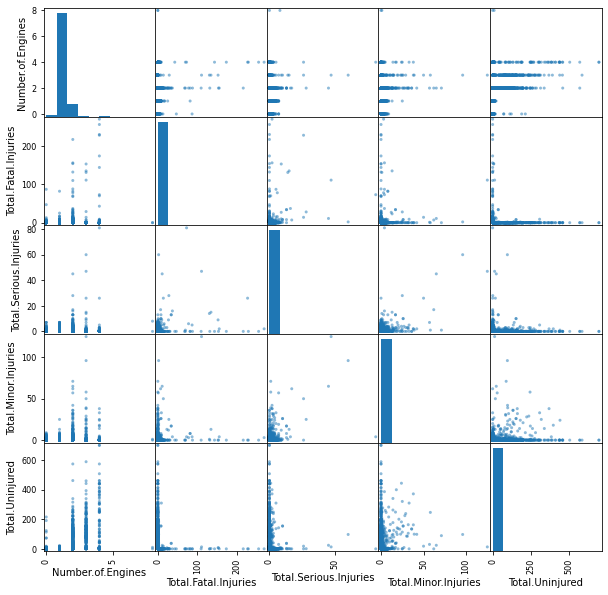

In [256]:
# Relationship between the continuous data

pd.plotting.scatter_matrix(df, figsize=(10,10));

- There is no correlation between number of engines, and how many people get hurt
- There is no correlation between total fatal injuries, and total uninjured people, meaning if an accident is fatal all passengers must fall between serious or minor injuries

There are some columns that will not be helpful in our analysis. We can remove them from the data.

In [ ]:
# Drop irrelevant columns

columns_to_drop = ['Accident.Number','Latitude','Longitude','Airport.Code','Airport.Name','FAR.Description',
                   'Schedule','Air.carrier','Publication.Date','Report.Status','Registration.Number']
df = df.drop(columns_to_drop, axis = 1)

### DATA PREPARATION
#### Data cleaning

We will start by check for duplicates before proceeding to dealing with null values. 

In [225]:
# Checking for duplicates

duplicates = df[df.duplicated(keep = False)]
duplicates

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
1370,20020917X02935,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
1371,20020917X02935,Accident,1982-05-28,"EVANSVILLE, IN",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,7.0,VMC,Cruise
3081,20020917X04638,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
3082,20020917X04638,Accident,1982-10-18,GULF OF MEXICO,GULF OF MEXICO,Fatal(3),Destroyed,Helicopter,Bell,206B,Yes,1.0,Turbo Shaft,Unknown,3.0,0.0,0.0,0.0,VMC,Cruise
4760,20001214X43016,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,Schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
4761,20001214X43016,Accident,1983-05-22,"BRIDGEPORT, CA",United States,Fatal(1),Substantial,NaN,Schempp-hirth,STANDARD CIRRUS,No,NaN,Unknown,Unknown,1.0,0.0,0.0,1.0,VMC,Cruise
7940,20001214X39345,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,Cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
7941,20001214X39345,Accident,1984-04-13,"DELAND, FL",United States,Non-Fatal,Substantial,NaN,Cessna,172P,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,2.0,VMC,Taxi
8660,20001214X40069,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,Snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing
8661,20001214X40069,Accident,1984-06-18,"PORTLAND, AR",United States,Non-Fatal,Substantial,NaN,Snow,AT400,No,1.0,Turbo Prop,Aerial Application,0.0,0.0,0.0,2.0,VMC,Landing


There are some duplicated values in the dataframe which we can eliminate.

In [226]:
# Dropping duplicates

df = df.drop_duplicates()

In [227]:
# Checking for null values as a % 

df.isna().sum()/len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058518
Country                    0.254330
Injury.Severity            1.124228
Aircraft.damage            3.591002
Aircraft.Category         63.672477
Make                       0.070897
Model                      0.103532
Amateur.Built              0.114786
Number.of.Engines          6.843272
Engine.Type                7.961873
Purpose.of.flight          6.965936
Total.Fatal.Injuries      12.826774
Total.Serious.Injuries    14.070290
Total.Minor.Injuries      13.420961
Total.Uninjured            6.648586
Weather.Condition          5.053961
Broad.phase.of.flight     30.566840
dtype: float64

We can see that 64% of the data in 'Aircraft.Category' is null. Let us investigate that column further.

In [228]:
# Checking values in 'Aircraft.Category'

df['Aircraft.Category'].value_counts()

Airplane             27613
Helicopter            3438
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

Since this data could be valuable in our analysis, we shall replace the null values with the text 'UFO' meaning unidentified flying object

In [229]:
# Replacing null values in 'Aircraft.Category'

df['Aircraft.Category'] = df['Aircraft.Category'].fillna('UFO')

In [275]:
# Replacing Unknown values in 'Aircraft.Category' with UFO

df['Aircraft.Category'] = df['Aircraft.Category'].replace({'Unknown':'UFO'})

In [230]:
# Re-checking for null values as a % 

df.isna().sum()/len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058518
Country                    0.254330
Injury.Severity            1.124228
Aircraft.damage            3.591002
Aircraft.Category          0.000000
Make                       0.070897
Model                      0.103532
Amateur.Built              0.114786
Number.of.Engines          6.843272
Engine.Type                7.961873
Purpose.of.flight          6.965936
Total.Fatal.Injuries      12.826774
Total.Serious.Injuries    14.070290
Total.Minor.Injuries      13.420961
Total.Uninjured            6.648586
Weather.Condition          5.053961
Broad.phase.of.flight     30.566840
dtype: float64

Our next column with 30 % null values is 'Broad.phase.of.flight'. Investigating this column:

In [231]:
df['Broad.phase.of.flight'].value_counts()

Landing        15427
Takeoff        12493
Cruise         10265
Maneuvering     8135
Approach        6543
Climb           2033
Taxi            1953
Descent         1887
Go-around       1353
Standing         943
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

Since this data could be valuable in our analysis, we will keep the data. However we can spot some more missing values in place holder term 'Unknown'. We shall add the rest of the missing values under this category.

In [232]:
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

In [233]:
# Re-checking for null values as a % 

df.isna().sum()/len(df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Event.Date                 0.000000
Location                   0.058518
Country                    0.254330
Injury.Severity            1.124228
Aircraft.damage            3.591002
Aircraft.Category          0.000000
Make                       0.070897
Model                      0.103532
Amateur.Built              0.114786
Number.of.Engines          6.843272
Engine.Type                7.961873
Purpose.of.flight          6.965936
Total.Fatal.Injuries      12.826774
Total.Serious.Injuries    14.070290
Total.Minor.Injuries      13.420961
Total.Uninjured            6.648586
Weather.Condition          5.053961
Broad.phase.of.flight      0.000000
dtype: float64

Checking the distributions for 'Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries' to gauge how to best fill the null values

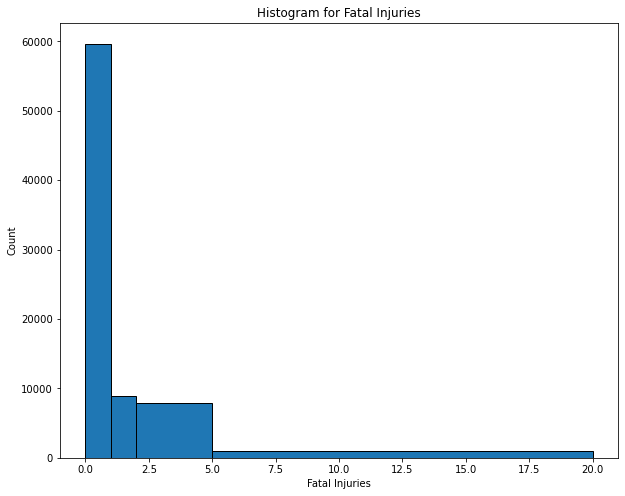

In [234]:
# Total.Fatal.Injuries 

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(x = df['Total.Fatal.Injuries'], bins = [0, 1, 2, 5, 20], edgecolor = 'black')
ax.set_title('Histogram for Fatal Injuries')
# x-axis label
ax.set_xlabel('Fatal Injuries')
# y-axis label
ax.set_ylabel('Count');

We can see that the number of fatal injuries per accident are almost always 0. For this column, we shall replace the missing values with the mode.

In [235]:
fatal_injuries_mode = df['Total.Fatal.Injuries'].mode()[0]
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(fatal_injuries_mode)

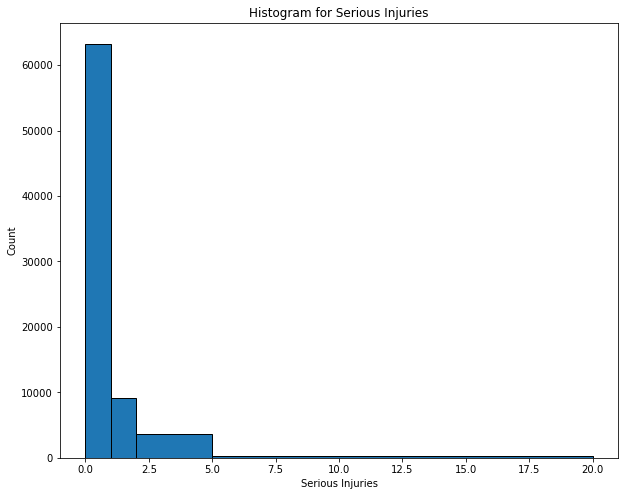

In [236]:
# Total.Serious.Injuries 

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(x = df['Total.Serious.Injuries'], bins = [0, 1, 2, 5, 20], edgecolor = 'black')
ax.set_title('Histogram for Serious Injuries')
# x-axis label
ax.set_xlabel('Serious Injuries')
# y-axis label
ax.set_ylabel('Count');

As was the case with fatal injuries, the mode for this column is between 0-1. This means that cases of serious injuries per aircraft accident is almost always 0. Replacing nan values with the mode makes sense here too.

In [237]:
serious_injuries_mode = df['Total.Serious.Injuries'].mode()[0]
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(serious_injuries_mode)

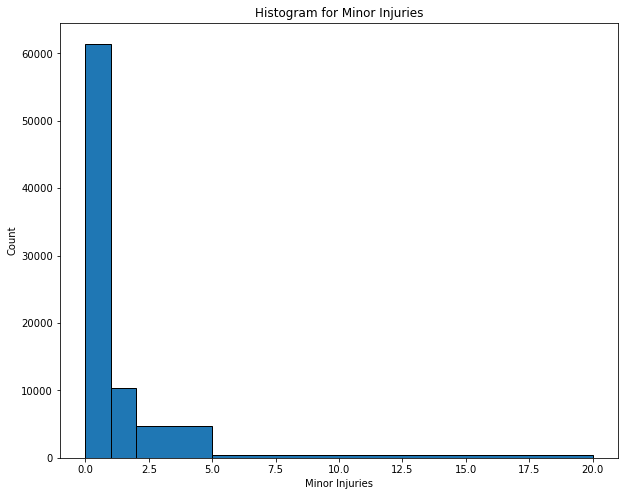

In [238]:
# Total.Minor.Injuries 

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(x = df['Total.Minor.Injuries'], bins = [0, 1, 2, 5, 20], edgecolor = 'black')
ax.set_title('Histogram for Minor Injuries')
# x-axis label
ax.set_xlabel('Minor Injuries')
# y-axis label
ax.set_ylabel('Count');

As we did with the serious and fatal columns, the same case applies here. The mode is a sensible placeholder.

In [239]:
minor_injuries_mode = df['Total.Minor.Injuries'].mode()[0]
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(minor_injuries_mode)

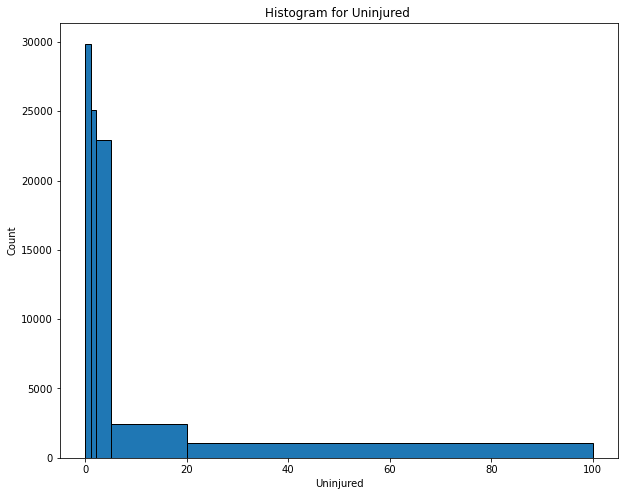

In [240]:
# Total.Uninjured 

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(x = df['Total.Uninjured'], bins = [0, 1, 2, 5, 20,100], edgecolor = 'black')
ax.set_title('Histogram for Uninjured ')
# x-axis label
ax.set_xlabel('Uninjured')
# y-axis label
ax.set_ylabel('Count');

Mode is a sensible placeholder

In [241]:
uninjured_mode = df['Total.Uninjured'].mode()[0]
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(uninjured_mode)

In [242]:
# Re-checking for null values as a % 

df.isna().sum()/len(df) * 100

Event.Id                  0.000000
Investigation.Type        0.000000
Event.Date                0.000000
Location                  0.058518
Country                   0.254330
Injury.Severity           1.124228
Aircraft.damage           3.591002
Aircraft.Category         0.000000
Make                      0.070897
Model                     0.103532
Amateur.Built             0.114786
Number.of.Engines         6.843272
Engine.Type               7.961873
Purpose.of.flight         6.965936
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         5.053961
Broad.phase.of.flight     0.000000
dtype: float64

In [243]:
# Check how many number of rows still have null values
null_present = df.isna().any(axis=1).sum()
rows_in_data = len(df)

print (f'{null_present} out of {rows_in_data} still have null values \n\n')
print (f'That is {(null_present / rows_in_data * 100).round(2)} % of the data')

13534 out of 88861 still have null values 


That is 15.23 % of the data


In [244]:
# Check for extraneous values
for col in df.columns:
    print(col, '\n', df[col].value_counts(), '\n\n')

Event.Id 
 20001214X45071    3
20001212X19172    3
20001213X29373    2
20060224X00236    2
20001206X01549    2
                 ..
20001214X44884    1
20080808X01183    1
20001213X29000    1
20001214X37458    1
20001206X01580    1
Name: Event.Id, Length: 87951, dtype: int64 


Investigation.Type 
 Accident    84992
Incident     3869
Name: Investigation.Type, dtype: int64 


Event.Date 
 1982-05-16    25
1984-06-30    25
2000-07-08    25
1986-05-17    24
1983-08-05    24
              ..
2004-12-26     1
2007-03-02     1
2020-12-23     1
2008-03-12     1
2015-07-28     1
Name: Event.Date, Length: 14782, dtype: int64 


Location 
 ANCHORAGE, AK        434
MIAMI, FL            200
ALBUQUERQUE, NM      196
HOUSTON, TX          192
CHICAGO, IL          184
                    ... 
SPRING LAKE, NC        1
RANDLE, WA             1
BOWMAN, CA             1
LORRAINE LAKE, AK      1
CARNEY, OK             1
Name: Location, Length: 27758, dtype: int64 


Country 
 United States                  

Based on the above data, we can drop a few more columns that seem redundant, to avoid losing relevant data when clearing all rows with null values. We can also notice some redundant values in the 'Make' column, in different cases.

In [245]:
# Dropping the 'Injury.Severity' column as we can get the same data from the 'Total.Fatal/Serious/Minor.Injuries' columns
df = df.drop('Injury.Severity', axis = 1)

In [246]:
# Filling missing values for the 'Engine.Type' column with existing placeholder 'None'

df['Engine.Type'] = df['Engine.Type'].fillna('None')

In [247]:
# Combining all placeholders values in the 'Engine.Type' column into 'None'

df['Engine.Type'] = df['Engine.Type'].replace({'NONE':'None'})

In [251]:
# Check how many number of rows still have null values

df.isna().any(axis=1).sum()/len(df)*100

12.985449184681693

In [252]:
# We can now drop all the rest of the missing values.

df = df.dropna()

# Check if we still have any missing values
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

In [296]:
# Standardizing values in the 'Make' column

df['Make'] = df['Make'].str.title()

#### ANALYSIS

To determine which aircraft are the lowest risk for the company we can start by looking at some correlations of some of the attributes relating to the type of aircraft and comparing them with the accidents extents

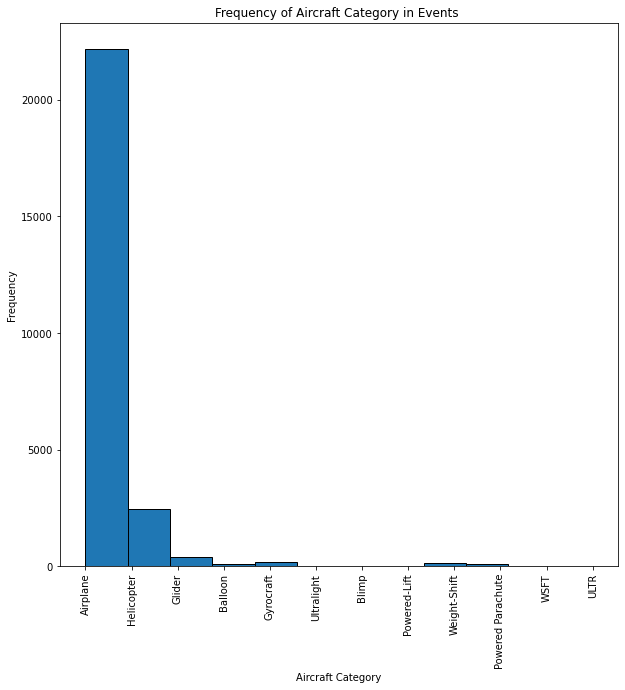

In [304]:
# Which 'Aircraft.Category' is more likely to be involved in incidents and accidents?

fig, ax = plt.subplots(figsize = (10,10))

# filter out the rows containing 'UFO' 
aircrafts = df[df['Aircraft.Category'] != 'UFO']

# Histogram plot for the 'Aircraft Category'
ax.hist(aircrafts['Aircraft.Category'], bins = 12, edgecolor = 'black')
ax.set_title('Frequency of Aircraft Category in Events ')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', labelrotation=90);

It is clear from the above analysis that airplanes are notorious for being involved in events. Before we start considering helicopters and balloons, let us further investigate if it is a specific type/feature of the plane that is problemtic.

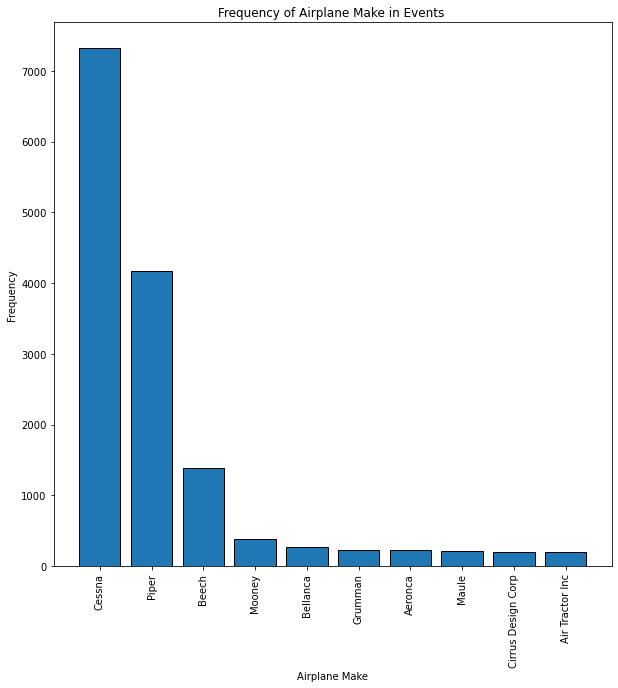

In [321]:
fig, ax = plt.subplots(figsize = (10,10))

# Filtering out the airplane category

airplanes = df[df['Aircraft.Category'] == 'Airplane']

# Defining the x and y axis

airplane_make = airplanes['Make'].value_counts().head(10).index.tolist()
count_airplane_make = airplanes['Make'].value_counts().head(10).values.tolist()

# Bar plot for the 'Aircraft Category' against counts

ax.bar(airplane_make, count_airplane_make, edgecolor = 'black')
ax.set_title('Frequency of Airplane Make in Events ')
ax.set_xlabel('Airplane Make')
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', labelrotation=90)

The 'Cessna' make appears to be the most popular, as it is the most frequently occurring in the events plotted. However, this doesn't necessarily indicate an issue with the make itself; it might simply reflect the high prevalence of Cessnas in the industry. The key question is: how can we determine if this is truly the case?
Maybe let us assess the extent of the damage for each make

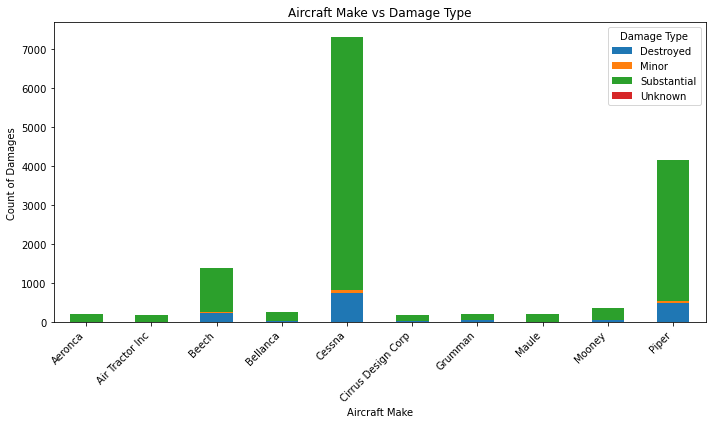

In [325]:
# Create a count of damage types per make
top_10_makes = airplane_make

# Filter the damage_counts DataFrame to only include the top 10 makes
damage_counts_filtered = airplanes[airplanes['Make'].isin(top_10_makes)]

# Create a count of damage types per make
damage_counts = pd.crosstab(damage_counts_filtered['Make'], damage_counts_filtered['Aircraft.damage'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as a stacked bar chart on the axis
damage_counts.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Count of Damages')
ax.set_title('Aircraft Make vs Damage Type')

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
ax.legend(title='Damage Type')

# Tight layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()